In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.optimizers import Adam

In [2]:
X_train = np.array([
    [10, 8, 2],
    [8, 6, 5],
    [12, 7, 1],
    [6, 6, 8],
    [15, 8, 0],
    [7, 5, 6],
    [9, 7, 3],
    [14, 9, 0],
    [5, 4, 10],
    [11, 8, 2]
])
y_train = np.array([85, 70, 90, 60, 95, 65, 80, 93, 50, 88])

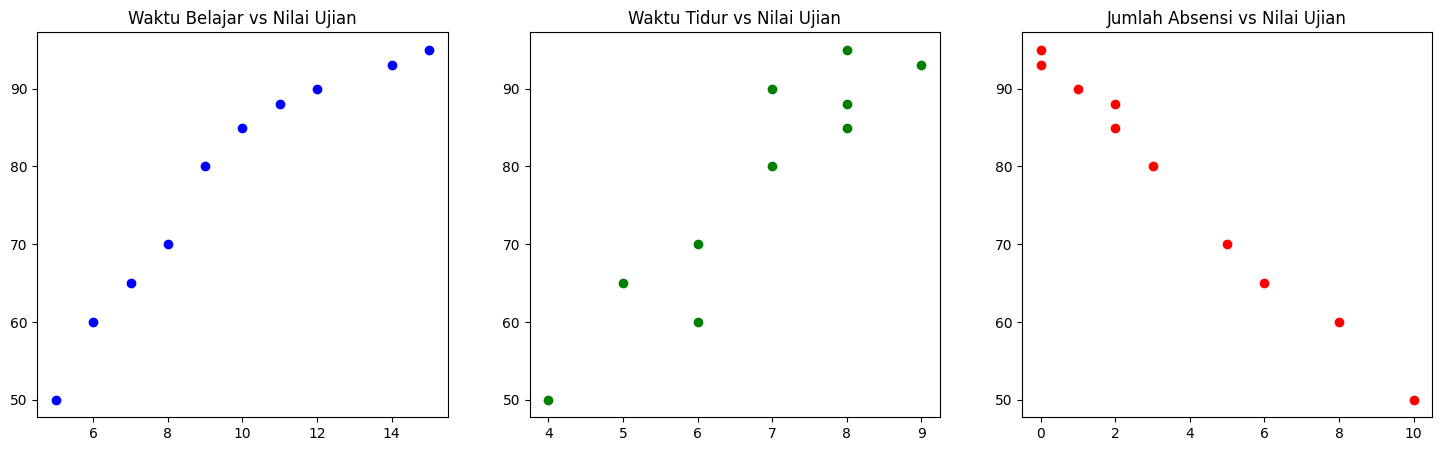

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

ax[0].scatter(X_train[:, 0], y_train, c="blue")
ax[0].set_title("Waktu Belajar vs Nilai Ujian")

ax[1].scatter(X_train[:, 1], y_train, c="green")
ax[1].set_title("Waktu Tidur vs Nilai Ujian")

ax[2].scatter(X_train[:, 2], y_train, c="red")
ax[2].set_title("Jumlah Absensi vs Nilai Ujian")
plt.show()

In [4]:
model = Sequential(
    [
        tf.keras.Input(shape=(3,)),
        Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(1, activation="linear"),
    ], name = "model_1"
)
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
[layer_1, layer_2] = model.layers
W1, b1 = layer_1.get_weights()
W2, b2 = layer_2.get_weights()

print(f"W shape in hidden layer : {W1.shape}, b shape in hidden layer : {b1.shape}")
print(f"W shape in output layer : {W2.shape}, b shape in output layer : {b2.shape}")

W shape in hidden layer : (3, 64), b shape in hidden layer : (64,)
W shape in output layer : (64, 1), b shape in output layer : (1,)


In [6]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=Adam(0.01)
)
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step - loss: 6254.3530
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5971.5972
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5697.0239
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5431.5498
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5172.7285
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4920.2539
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4671.0493
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4422.7363
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4174.8657
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3924.2036
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3671.6558
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3417.0952
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3159.9702
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2902.1243
Epoch 15/1000
1/1 ━━━━━━━━━━

In [ ]:
y_hat = np.zeros(y_train.shape[0])

for i in range(y_train.shape[0]):
    y_hat[i] = model.predict(X_train)[i][0]
    print(f"prediction : {y_hat[i]:0.2f}, target : {y_train[i]}")

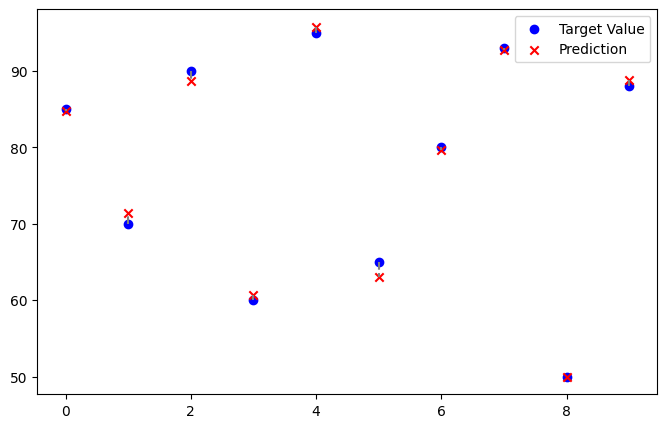

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Target Value')
plt.scatter(range(len(y_hat)), y_hat, color='red', marker='x', label='Prediction')

for i in range(len(y_train)):
    plt.plot([i, i], [y_train[i], y_hat[i]], color='gray', linestyle='dashed')

plt.legend()
plt.show()